In [1]:
pip install sysidentpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 4.1 MB/s eta 0:00:00


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Final Dataset.xlsx to Final Dataset.xlsx


In [2]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install numpy pandas matplotlib statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [66]:
%matplotlib inline
var=pd.read_excel('Final Dataset.xlsx', sheet_name='Model_Dataset', skiprows=[0, 2])
# var.dropna(inplace=True)
var.head()

,Date,BNB-USD,BTC-USD,ETH-USD,USDT-USD,XRP-USD,ADA-USD,BITG-USD,MIOTA-USD,XNO-USD,POWR-USD,Power,Ground Transport,Residential,Domestic Aviation,International Aviation
0,2019-01-03,-0.283723,-0.146478,-0.218059,-0.242175,-0.213296,-0.133797,0.272976,-0.350994,-0.212519,-0.541858,0.017161,0.100704,-0.013013,0.037922,0.026545
1,2019-01-04,0.250258,0.067790,0.155431,0.110796,0.026443,-0.276461,-0.199125,0.001564,0.155184,-0.798119,0.015954,0.002050,-0.008488,-0.013425,0.013110
2,2019-01-05,0.034520,0.058029,0.065619,0.024849,0.003227,0.448817,-1.063302,-0.364719,0.394051,0.533827,-0.031367,-0.072048,-0.042761,-0.084376,0.028308
3,2019-01-06,0.314991,0.085648,-0.032553,0.056192,0.085732,0.716078,-0.655398,0.427898,0.268170,1.404755,-0.020110,-0.145075,-0.015340,0.001235,0.016680
4,2019-01-07,-0.092145,-0.068087,-0.175156,-0.115993,0.013049,-0.117139,0.675955,-0.436056,-0.465483,-1.400369,0.045889,0.199612,0.012749,0.042424,-0.069635


In [67]:
ADA_BITG_USD_var=var.iloc[:, 6:8]


In [37]:
ADA_BITG_USD_var

,ADA-USD,BITG-USD
0,-0.133797,0.272976
1,-0.276461,-0.199125
2,0.448817,-1.063302
3,0.716078,-0.655398
4,-0.117139,0.675955
...,...,...
1544,0.317827,-0.029414
1545,0.055900,0.014815
1546,0.390388,1.317827
1547,-0.188504,-0.472632


In [38]:
output_var=var.iloc[:, 11]

In [68]:
ADA_BITG_USD_var.isna()

,ADA-USD,BITG-USD
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1544,False,False
1545,False,False
1546,False,False
1547,False,False


In [69]:
var=var.drop(columns=["ETH-USD",	"USDT-USD",	"XRP-USD", "BNB-USD",	"BTC-USD",	"MIOTA-USD",	"XNO-USD",	"POWR-USD", "Ground Transport", "Residential", "Domestic Aviation", "International Aviation"])

In [70]:
ADA_BITG_USD_var.isnull().sum()

ADA-USD      0
BITG-USD    34
dtype: int64

In [73]:
ADA_BITG_USD_var.dropna(inplace=True)


In [74]:
ADA_BITG_USD_var.isnull().sum()

ADA-USD     0
BITG-USD    0
dtype: int64

In [76]:
len(ADA_BITG_USD_var)

1515

In [78]:
ADA_BITG_USD_var.tail()

,ADA-USD,BITG-USD
1544,0.317827,-0.029414
1545,0.055900,0.014815
1546,0.390388,1.317827
1547,-0.188504,-0.472632
1548,0.488918,0.016702


<Axes: >

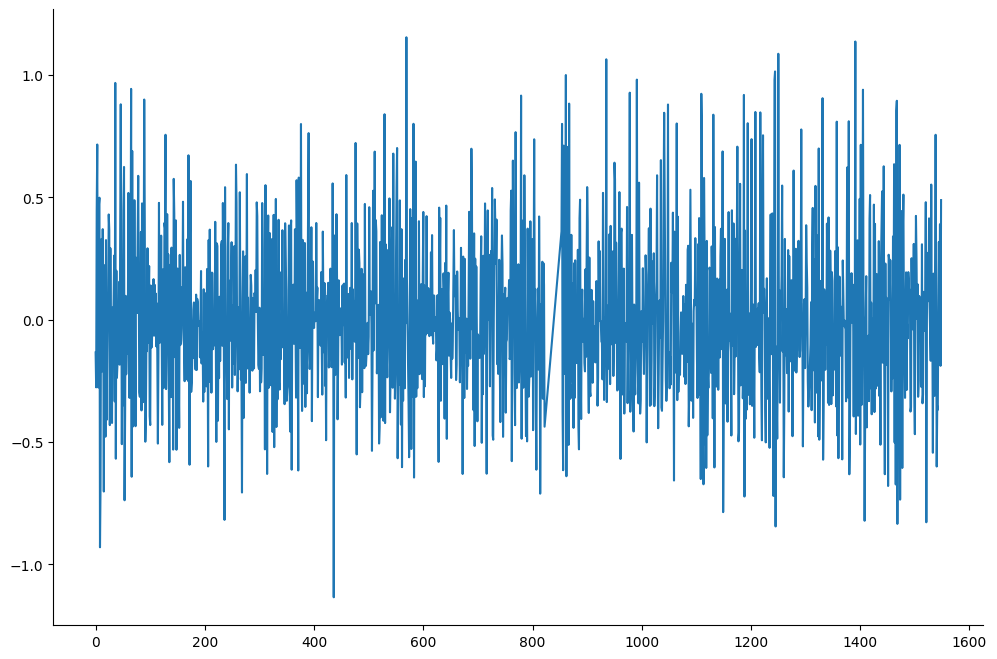

In [79]:
ADA_BITG_USD_var['ADA-USD'][0:1530].plot(figsize=(12, 8))


<Axes: >

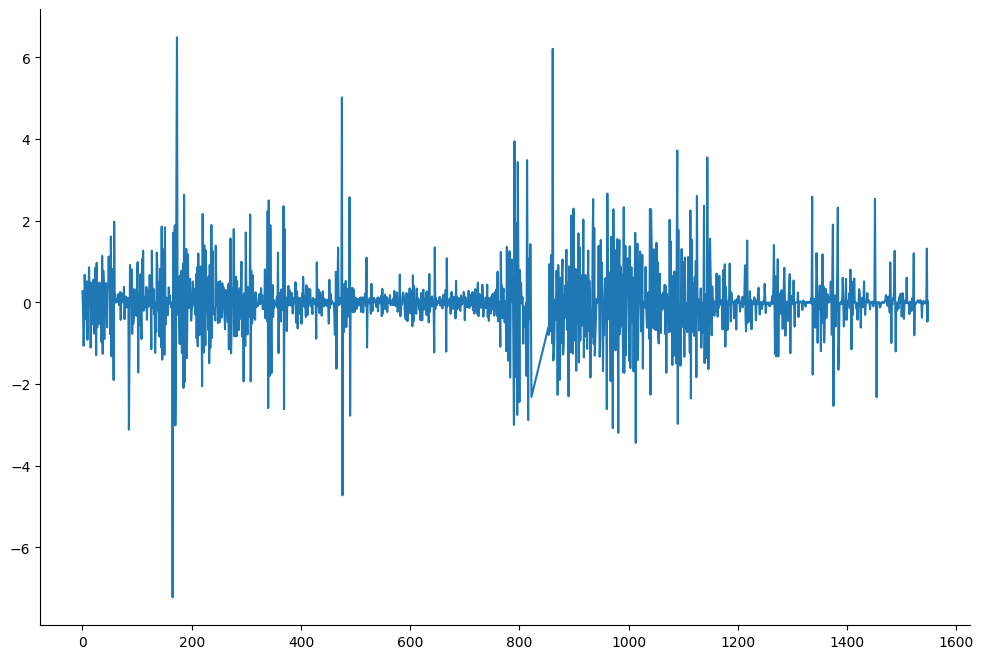

In [80]:
ADA_BITG_USD_var['BITG-USD'][0:1530].plot(figsize=(12, 8))


<Axes: >

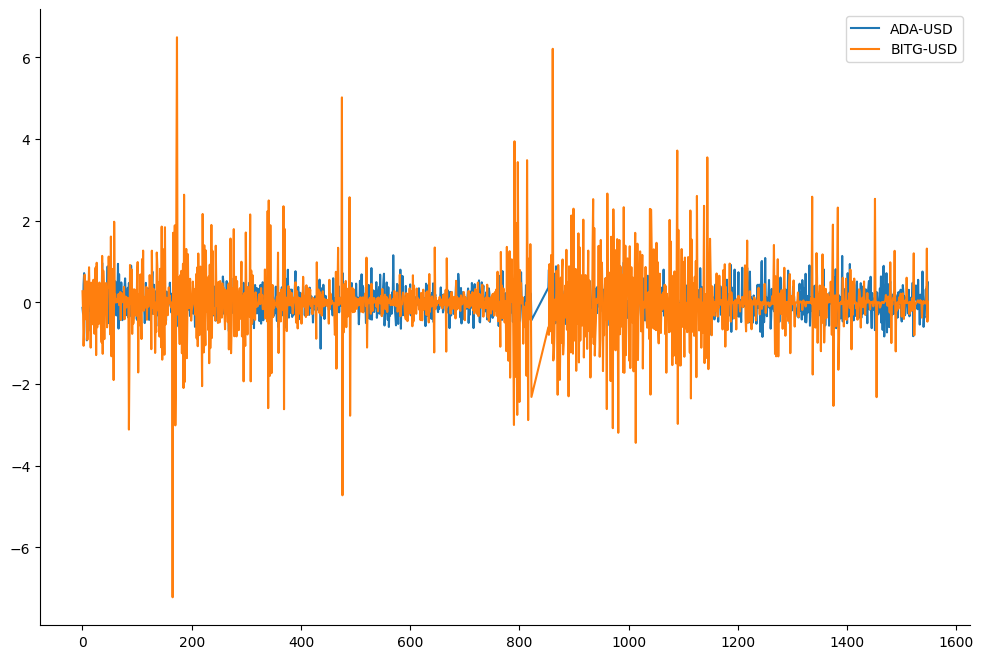

In [82]:
ADA_BITG_USD_var[['ADA-USD', 'BITG-USD']][0:1530].plot(figsize=(12, 8))


<Axes: >

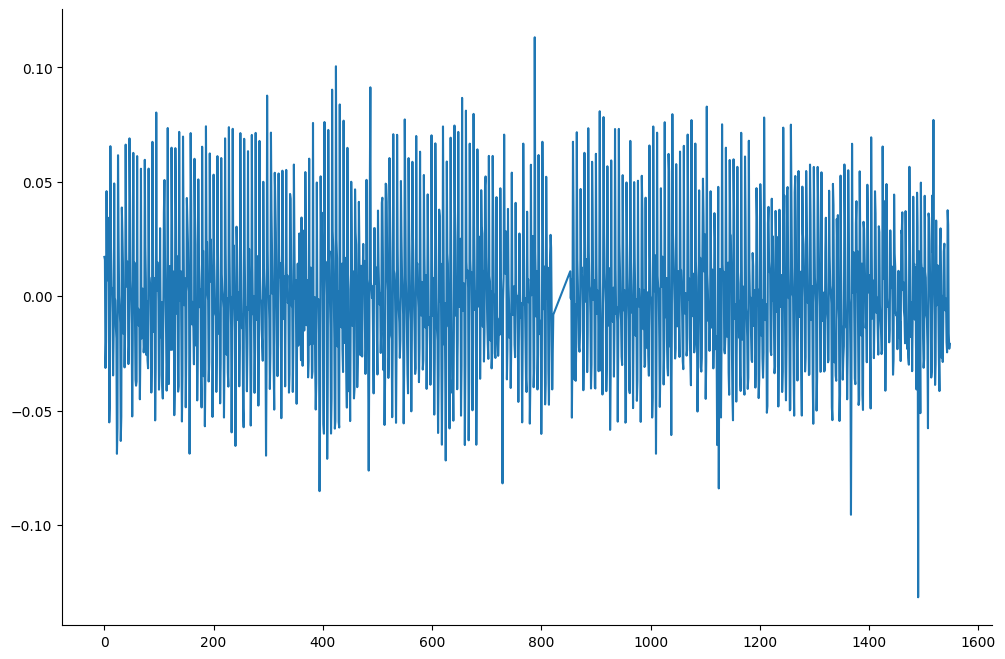

In [83]:
var['Power'][0:1530].plot(figsize=(12, 8))


<Axes: >

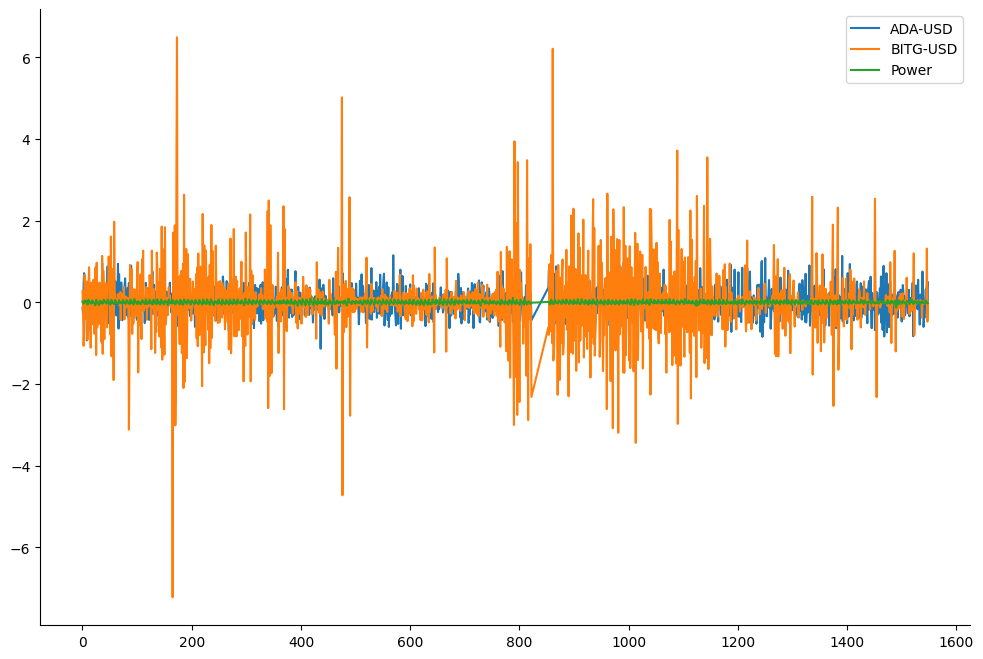

In [84]:
var[['ADA-USD', 'BITG-USD', 'Power']][0:1530].plot(figsize=(12, 8))


In [86]:
df=pd.DataFrame(ADA_BITG_USD_var)
x = df.to_numpy()
df1=pd.DataFrame(var['Power'])
S= df1.to_numpy()

In [87]:
x_train, x_valid, y_train, y_valid = train_test_split(x,S,train_size=0.85,shuffle= False)


In [88]:
df

,ADA-USD,BITG-USD
0,-0.133797,0.272976
1,-0.276461,-0.199125
2,0.448817,-1.063302
3,0.716078,-0.655398
4,-0.117139,0.675955
...,...,...
1544,0.317827,-0.029414
1545,0.055900,0.014815
1546,0.390388,1.317827
1547,-0.188504,-0.472632


In [89]:
df1

,Power
0,0.017161
1,0.015954
2,-0.031367
3,-0.020110
4,0.045889
...,...
1544,0.037557
1545,0.031142
1546,-0.016223
1547,-0.022966


In [90]:
len(x_valid)

228

In [91]:
len(y_valid)
# len(y_train)

228

In [92]:
len(x_train)

1287

In [ ]:
# # Concatenate input features and target variable for the validation set
# valid_data = np.column_stack((x_valid, y_valid))

In [93]:
basis_function = Polynomial(degree=3)

model = FROLS(
    order_selection=True,
    n_terms=50,
    extended_least_squares=False,
    ylag=15,
    xlag=[15, 15],
    info_criteria='bic',
    estimator='least_squares',
    basis_function=basis_function
)

/usr/local/lib/python3.10/dist-packages/sysidentpy/utils/deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)


In [94]:
model.fit(X=x_train, y=y_train)

In [95]:
yhat = model.predict(X=x_valid, y=y_valid, steps_ahead=1)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)

0.7424885423126195
            Regressors   Parameters             ERR
0               y(k-7)   5.4323E-01  6.61864806E-01
1              y(k-14)   3.0496E-01  4.86499669E-02
2       x1(k-8)x1(k-1)  -9.4190E+01  9.17177518E-03
3      x2(k-9)x1(k-11)  -5.2834E+01  6.73281840E-03
4        y(k-11)y(k-5)   5.1668E+01  5.15936636E-03
5               y(k-2)  -2.8643E-01  9.14107795E-03
6               y(k-4)  -1.0496E-01  6.55874246E-03
7       x2(k-14)y(k-1)   3.3875E+00  5.30016558E-03
8             x2(k-12)   6.9428E+00  7.16755770E-03
9        x2(k-1)y(k-5)   3.1049E+01  7.47046336E-03
10    x1(k-12)x1(k-11)   1.6669E+01  4.28511280E-03
11    x1(k-14)x1(k-10)  -3.6640E+01  2.15912264E-03
12     x2(k-7)x1(k-10)  -5.6290E+01  3.46081294E-03
13       x2(k-5)y(k-7)  -8.1692E+01  2.69412249E-03
14      x2(k-9)x1(k-8)   5.1814E+01  2.34635471E-03
15       x1(k-3)y(k-3)   1.0029E-01  2.01607904E-03
16     x2(k-10)x1(k-1)   4.6733E+01  2.15343146E-03
17       y(k-15)y(k-8)   4.7756E+01  1.667652

In [96]:
r["ERR"] = pd.to_numeric(r["ERR"], downcast="float")

print('Sum of ERR=  ',r['ERR'].sum())

Sum of ERR=   0.8180222


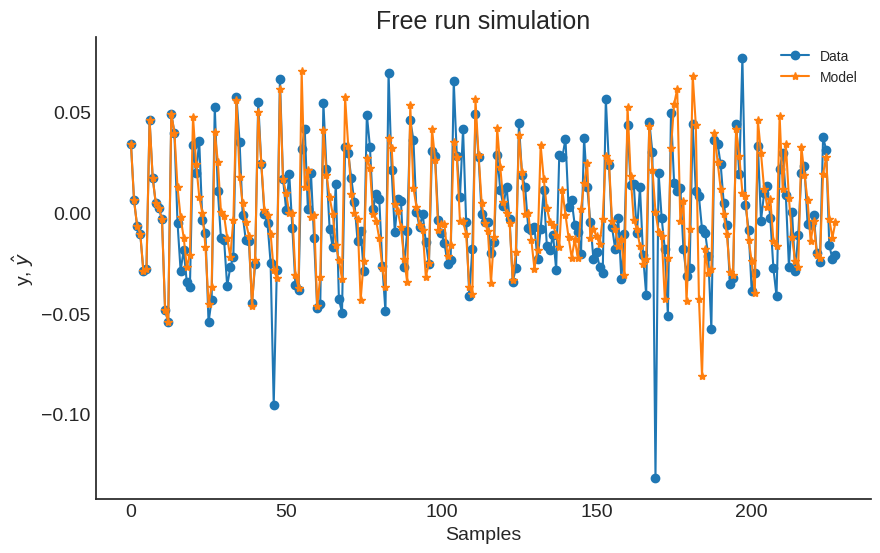

In [97]:
plot_results(y=y_valid, yhat = yhat, n=1000)
# ee = compute_residues_autocorrelation(y_valid, yhat)
# plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
# x1e = compute_cross_correlation(y_valid, yhat, x_valid)
# plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

In [99]:
t2 = var['Date'][1287:1520]

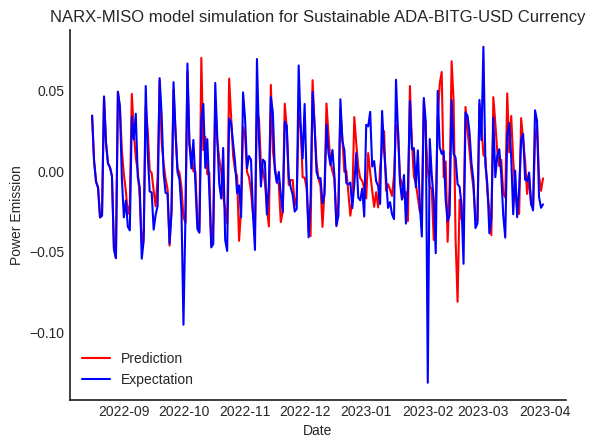

In [100]:
plt.plot(t2, yhat, label = "Prediction", color='red')

# plotting the line 2 points
plt.plot(t2, y_valid, label = "Expectation", color='blue')
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('Power Emission')
# Set a title of the current axes.
plt.title('NARX-MISO model simulation for Sustainable ADA-BITG-USD Currency')
# show a legend on the plot
plt.legend()
plt.savefig('MISO_fw.png')

In [101]:
len(yhat)

228

In [102]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(yhat, S[1287:1520])

rmse(yhat, y_valid)

0.019840892495495695

In [103]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(S[1287:1520], yhat, squared=False)
rms

0.019840892495495695

In [104]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_valid, yhat)
mae

0.013354756017633605

In [105]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_valid, yhat)
mape

1.552386245440256

In [106]:
from numpy import savetxt
savetxt('yhat.csv', yhat, delimiter=',')
r.to_csv('Model_Structure.csv')
df_1 = pd.DataFrame(S[1287:1520], columns=['Expectation-O/P'])
df_1

,Expectation-O/P
0,0.034271
1,0.006073
2,-0.006707
3,-0.010456
4,-0.028897
...,...
223,0.037557
224,0.031142
225,-0.016223
226,-0.022966


In [107]:
df_1['Prediction-O/P'] = yhat
df_1

,Expectation-O/P,Prediction-O/P
0,0.034271,0.034271
1,0.006073,0.006073
2,-0.006707,-0.006707
3,-0.010456,-0.010456
4,-0.028897,-0.028897
...,...,...
223,0.037557,0.019348
224,0.031142,0.027494
225,-0.016223,-0.003196
226,-0.022966,-0.012396


In [108]:
len(df_1)
df_1.columns

Index(['Expectation-O/P', 'Prediction-O/P'], dtype='object')

In [111]:
import plotly.express as px
import pandas as pd
import numpy as np

# data
fig = px.line(df_1, x=var ['Date'][1287:1520], y= df_1.columns[0:2],labels=dict(value="Power Emission"),title="NARX-MISO model simulation for ADA-BITG-USD Sustainable Currency")

# Show plot
fig.show()

In [112]:
import plotly.graph_objects as go

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x= var['Date'][1287:1520], y=df_1["Expectation-O/P"], name="Expectation", mode="lines"))
fig2.add_trace(go.Scatter(x= var['Date'][1287:1520], y=df_1["Prediction-O/P"], name="Prediction", mode="lines"))
fig2.update_layout(
    title="NARX-MISO model simulation for ADA-BITG-USD Sustainable Currency", xaxis_title="Year", yaxis_title="Power Emission"
)
fig2.show()